<a href="https://colab.research.google.com/github/emirdemic/Learning-TensorFlow/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow Tutorial**



This notebook contains practices and notes from Daniel Bourke's 14 hours long tutorial on TensorFlow 2.0. This notebook is separated into different parts in accordance to how Daniel's video is split. 

Note that this notebook also contains some trivial theory and/or code, but I've decided to insert that as well since I wanted the notebook to be as representative of the tutorial as possible.

If you want to run some chunk of code, please run all the code included in that section.


---






## Introduction to DL

### Deap Learning


Deep learning is a type of machine learning based on artificial neural networks in which multiple layers of processing are used to extract progressively higher level features from data. 

So what is the difference between a traditional programming and machine learning programmings? In a traditional programming, we have some inputs, then we establish some rules in order to get the output. However, in machine learning, we start with inputs and the ideal outputs and then we try to find some rules between inputs and outputs. How do we find those rules? Well, we use machine learning algorithms such as linear regression, logistic regression, SVM, etc. 

### Why Should We Use Deep learning?

For complex problems, thinking about all the rules is nearly impossible. Furthermore, when we take into account that those rule might change in different situations, it becomes impossible to solve some problems using traditional programming paradigms. However, if we can build a simple rule-based system that doesn't require deep learning, then don't use deep learning. If a problem is completely deterministic with a finite set of rules, deep learning is a over-kill or could even underperform in comparison to a traditional programming paradigm. 

Deep learning is useful when we have problems with long lists of rules, when we are continually chaning environments, or when we want to discover insights within large collections of data.

In which situations *deep learning* is typically not that good for? The first one is when we need explainability of our model. Futhermore, deep learning is probably not a best option when the traditional approach is a better option, when errors are unacceptable, or when we don't have much data. 
<br></br>
So, when to use traditional ML algorithms and when to use DL algorithms? Traditional ML algorithms are often the best choice for structured data, while DL algorithms often outperform traditional ML algorithms on unstructured data (pictures, videos, sentences, etc.). 

### What are Neural Networks?



A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network composed of artificial neurons or nodes. 
<br></br>

<div style="text-align:center"><img src="https://www.nicepng.com/png/detail/880-8805864_neural-networks-are-a-set-of-algorithms-which.png" /></div>


In the picture above, the first column represent the input data, while the last column represent the output. Everything in between those columns are *hideen layers*. Each node in a hidden layer is an activation of combination of nodes in the previous layer. 

What does that mean? Let's say that in this example, we have four input variables. All those four input variables are combined in order to get the first node of the first hidden layer, as well as the second, third and fourth node of the first hidden layer.

How do we combine nodes from the previous layer? We use a simple linear combination. For example, the linear combination for the first node in the first hidden layer is given by:

$$
\begin{aligned}
z_{1}^{[1]} = w_{1}^{[1]T}x + b_{1}^{[1]}
\end{aligned}
$$

where $w_{1}^{[1]T}$ is the vector with adequate weights, $x$ are features from the previous layer, and $b_{1}^{[1]}$ is the bias for that node. In this notation, subscripts refer to the specific node, while the superscripts refer to the specific hidden layer. After we get the linear combination, we need to have some kind of *activation function* in order to approximate more complicated function. If we do not apply some activation function, our neural network will always approcimate linear functions regardless of the number of hidden layers.

Some popular choices for activation functions are sigmoid function, hyperbolic tangent function, rectified lienar unit (ReLU), and leaky rectified linear unit (LReLU):

$$
\begin{aligned}
sigmoid = \frac{1}{1 + e^{-z}}
\end{aligned}
$$
<br>
$$
\begin{aligned}
hyperbolic = \frac{e^z - e^{-z}}{e^z + e^{-z}}
\end{aligned}
$$
<br>
$$
\begin{aligned}
ReLU = max(0, z)
\end{aligned}
$$
<br>
$$
\begin{aligned}
LReLU = max(0.01 * z, z)
\end{aligned}
$$
<br>
After we choose a specific activation function, all that we need to do for the specific node of the specific hidden layer is to calculate:

$$
\begin{aligned}
a_{1}^{[1]} = g(z)
\end{aligned}
$$

where *g* is the activation function. After that, we do the same calculation for each node of the first hidden layer and we get the activation of the first hidden layer. Now, combinations of activations of the first hidden layers are inputs for the second layer, and so on until we get to the final layer - the output layer.

Having that in mind, the first thing that we would be tempted to do is to create a `for loop` in order to calculate the activations of the first hidden layer. However, that would be computationally inefficient since we can combine all nodes of one hidden layer, weights, and biases into a matrix representation which significantly speeds up our process. In this case, the activation of one *whole* hidden layer $l$ is given by:


$$
\begin{aligned}
A^{[l]} = g(W^{[l]}A^{l-1} + b^{[l]})
\end{aligned}
$$

where superscript $l$ refers to the specific hidden layer, and $A^{l-1}$ are the activations from the previous layer. This means that we have only one computation per one hidden layer, instead of $n$ computations, where $n$ is the number of nodes in a hidden layer. 

In order to train a neural network, we firstly initiate some random values for $W^{[l]}$ and $b^{[l]}$, and go through the first step of *forward propagation*, until we come to the final output. This means that we will go through the process of calcualting the activation of each hidden layer with some randomly intitiated numbers until we come to the output, i.e. until we produce some numbers as the output. Since (in supervised learning) our data already has the correct output values, we can compare the predictions of our neural network with the correct output values and determine how bad is our neural network. We formalize how bad the neural network is by defining a *loss function* which entirely depends on the nature of the problem. For example, if our output is a binary variable, then we model output with Bernoulli distribution and apply Maximum Likelihood Estimation which gives us:

$$
\begin{aligned}
L(\hat{y}, y) = -(ylog\hat{y} + (1-y)log(1-\hat{y}))
\end{aligned}
$$

Now we have a way to formalize the error of our neural network. Now, in order to improve our neural network, we would apply a *gradient descent algorithm* which changes weights and biases so that the loss function is smaller. The gradient descent algorithm is not that complicated, although it is really elegant. However, I am not going to show it here.

### What is DL Actually Used For?

Let's take a look at some common deep learning use cases. 
Some of them are recommendation systems, language translations, computer vision, speech recognition, natural language processing, etc. Language translation and speech recognition are oftern referred to as *sequence to sequence* problems. 

## Introduction to TensorFlow

### What is TensorFlow? What are Tensors?

TensorFlow (TF) is end-to-end platform for machine learning. We can write fast deep learning code in Python and run it on GPU. With TF we are also able to access many pre-built deep learning models. Furthermore, it offers a whole stack: preprocessing data, model data, and deploy the model in your application. In the end, TF was originally designed and used in-house by Google and is now open-source. 
<br></br>
What exactly is a tensor? In mathematics, a tensor is an algebraic object that describes a relationship between sets of algebraic objects related to a vector space. Objects that tensors may map between include vectors and scalars, and even other tensors. 

A TF workflow typically includes:


1.   Getting data ready
2.   Building or picking a pretrained model
3.   Fitting the model to the data and making predictions
4.   Evaluating the model
5.   Improving the model through the experimentation
6.   Saving and reloading trained models 



## Tensors in TensorFlow

In this part, we are going to cover some of the most fundamental concepts of tensors using TensorFlow. 

More specifically, this part will cover:
* Introduction to tensors
* Getting information from tensors
* Maniuplating tensors
* Tensors and NumPy
* Using @tf.function
* Using GPUs with TensorFlow (or TPUs)
* A few exercises

### Introduction to Tensors

In [ ]:
# Import TensorFlow
import tensorflow as tf 
import numpy as np
print(tf.__version__)

2.4.1


In [ ]:
# Create tensor with tf.constant()
scalar = tf.constant(7)
print(scalar)

tf.Tensor(7, shape=(), dtype=int32)


In [ ]:
# Check the number of dimensions of a tensor
print("Dimensions of scalar:\n", scalar.ndim)

Dimensions of scalar:
 0


In [ ]:
# Create a vector
vector = tf.constant([1, 2, 3, 4, 5])
print("Vector:\n", vector)
print("\nDimensions:\n", vector.ndim)

Vector:
 tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)

Dimensions:
 1


In [ ]:
# Create a matrix
matrix = tf.constant([
                      [1, 2, 3, 4, 5], 
                      [3, 4, 5, 6, 7]
                      ]
                     )
print("Matrix:\n", matrix)
print("\nDimensions:\n", matrix.ndim)

Matrix:
 tf.Tensor(
[[1 2 3 4 5]
 [3 4 5 6 7]], shape=(2, 5), dtype=int32)

Dimensions:
 2


In [ ]:
# Let's formally use args of tf.constant()
matrix1 = tf.constant(value = [[1, 2, 3, 4], [2, 2, 2, 2]], dtype = tf.float16)
print("Matrix:\n", matrix1)
print("\nDimensions:\n", matrix1.ndim)
print("\nType:\n", matrix1.dtype)
print("\nShape:\n", matrix1.shape)

Matrix:
 tf.Tensor(
[[1. 2. 3. 4.]
 [2. 2. 2. 2.]], shape=(2, 4), dtype=float16)

Dimensions:
 2

Type:
 <dtype: 'float16'>

Shape:
 (2, 4)


In [ ]:
tensor = tf.constant([[
                       [1, 2, 3], 
                       [4, 5, 6]], 
                      [[7, 8, 9], 
                       [10, 11, 12]],
                      [[13, 14, 15], 
                       [16, 17, 18]]] ,dtype = tf.float16)
print("Tensor:\n", tensor)
print("\nDimensions:\n", tensor.ndim)
print("\nShape:\n", tensor.shape)

Tensor:
 tf.Tensor(
[[[ 1.  2.  3.]
  [ 4.  5.  6.]]

 [[ 7.  8.  9.]
  [10. 11. 12.]]

 [[13. 14. 15.]
  [16. 17. 18.]]], shape=(3, 2, 3), dtype=float16)

Dimensions:
 3

Shape:
 (3, 2, 3)


What have we created so far?
* Scalar: a single number
* Vector: a number with direction
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (where $n\ge 0$)

### Creating Tensors with tf.Variable()

In [ ]:
# So far, we have created tensors with tf.constant(), but we can do it with tf.Variable() as well
# The difference between tf.Variable() and tf.constant() is that tf.Variable() creates a changeable tensor
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
print(changeable_tensor)
print(unchangeable_tensor)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>
tf.Tensor([10  7], shape=(2,), dtype=int32)


In [ ]:
# Try to change one of the elements in our changeable tensor
try:
  changeable_tensor[0].assign(99)
  print('Changing value was successful')
  print(changeable_tensor)
except:
  print('Changing value was not succesful')

Changing value was successful
<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([99,  7], dtype=int32)>


In [ ]:
# Now let's try to change value in unchangeable tensor
try:
  unchangeable_tensor[0].assign(99)
  print('Changing value was successful')
  print(unchangeable_tensor)
except Exception as e:
  print('Changing value was not succesful')
  print(e)

Changing value was not succesful
'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'


### Creating Random Tensors 

Random tensors are tensors of some arbitrary size which contain random numbers. We need random tensors when initializing weights and biasis in neural networks (or, more generally, in any other machine learning algorithm which requires some beginning random numbers). 

In [ ]:
# Let's create two random (but same) tensors
random1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random1 = random1.normal(shape = (3, 2))
print(random1)

tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)


In [ ]:
random_2 = tf.random.Generator.from_seed(41)
random_2 = random_2.normal(shape = (3, 2))
print(random_2)

tf.Tensor(
[[ 0.31662667 -1.4391748 ]
 [ 0.58923835 -1.4268045 ]
 [-0.7565803  -0.06854702]], shape=(3, 2), dtype=float32)


In [ ]:
# Are they equal?
print(random1 == random_2)

tf.Tensor(
[[False False]
 [False False]
 [False False]], shape=(3, 2), dtype=bool)


In [ ]:
# What if we want to shuffle the order of rows?
tf.random.set_seed(42) # setting a general? seed
print(tf.random.shuffle(random1)) # It doesn't shuffle inplace, you have to assign to a variable
print("\n", random1)

tf.Tensor(
[[ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]
 [-0.7565803  -0.06854702]], shape=(3, 2), dtype=float32)

 tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)


In [ ]:
# Creating a transpose of a tensor
print(tf.transpose(random1))

tf.Tensor(
[[-0.7565803   0.07595026 -0.23193763]
 [-0.06854702 -1.2573844  -1.8107855 ]], shape=(2, 3), dtype=float32)


### Other Ways to Create Tensors

In [ ]:
np_x = np.random.normal(size = (5, 5))
print(np_x)

[[ 0.61376625  0.17567101 -0.37463976 -0.57743222 -1.25069587]
 [-0.76320526  1.50980614 -1.25074362 -0.33863673  0.40279063]
 [-0.5509734   0.39784563 -1.95222535 -1.28737578 -0.20740423]
 [-0.56241199  1.31378423  0.91515086  0.07982129  1.28257355]
 [ 0.58298645  0.82893871  0.04984181 -1.62783812 -1.41289967]]


In [ ]:
tensor_np = tf.convert_to_tensor(np_x)
print(tensor_np)

tf.Tensor(
[[ 0.61376625  0.17567101 -0.37463976 -0.57743222 -1.25069587]
 [-0.76320526  1.50980614 -1.25074362 -0.33863673  0.40279063]
 [-0.5509734   0.39784563 -1.95222535 -1.28737578 -0.20740423]
 [-0.56241199  1.31378423  0.91515086  0.07982129  1.28257355]
 [ 0.58298645  0.82893871  0.04984181 -1.62783812 -1.41289967]], shape=(5, 5), dtype=float64)


> But you can also just input NumPy array into tf.constant() or tf.Variable()!

In [ ]:
ones = tf.ones(shape = (7, 6), dtype = tf.int32)
zeros = tf.zeros(shape = (3, 3), dtype = tf.int16)
print("Tensor of ones:\n", ones)
print("\nTensor of zeros:\n", zeros)

Tensor of ones:
 tf.Tensor(
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]], shape=(7, 6), dtype=int32)

Tensor of zeros:
 tf.Tensor(
[[0 0 0]
 [0 0 0]
 [0 0 0]], shape=(3, 3), dtype=int16)


> The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

### Getting Information from Tensors

The most frequently used information from tensors are:
* shape
* rank (n of dimensinos)
* axis or dimension
* size

In [ ]:
tensor_A = tf.constant([
                        [1, 2, 3, 4],
                        [3, 2, 2, 2],
                        [3, 2, 1, 3],
                        [5, 4, 3, 2]
                        ])

In [ ]:
print('Shape of tensor:', tensor_A.shape)
print('Rank of tensor:', tensor_A.ndim)
print('Size of tensor:', tf.size(tensor_A))

Shape of tensor: (4, 4)
Rank of tensor: 2
Size of tensor: tf.Tensor(16, shape=(), dtype=int32)


In [ ]:
print('The first column:')
print(tensor_A[:, 0])

The first column:
tf.Tensor([1 3 3 5], shape=(4,), dtype=int32)


In [ ]:
# Get various attributes of our tensor
print("Datatype of every element:", tensor_A.dtype)
print("Number of dimensions:", tensor_A.ndim)
print("The size of tensor:", tf.size(tensor_A))
print("The shape of tensor:", tensor_A.shape)
print("Elements along 0 axis:", tensor_A.shape[0])
print("Elements along 1 axis:", tensor_A.shape[1])

Datatype of every element: <dtype: 'int32'>
Number of dimensions: 2
The size of tensor: tf.Tensor(16, shape=(), dtype=int32)
The shape of tensor: (4, 4)
Elements along 0 axis: 4
Elements along 1 axis: 4


### Indexing Tensors

> Tensors can be indexed just like NumPy arrays.

In [ ]:
# Get the first 2 elements of each dimension
print(tensor_A[:2, :2])

tf.Tensor(
[[1 2]
 [3 2]], shape=(2, 2), dtype=int32)


In [ ]:
# Get the first element from each dimencion from each index except for the final one
print(tensor_A[:1, :])

tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [ ]:
# Let's create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant(np.random.normal(size = (3, 4)))
print(rank_2_tensor)

tf.Tensor(
[[ 1.1199121  -0.77232915 -0.00597473 -0.02029698]
 [-0.64639537 -0.43004214  2.32853803 -0.65769914]
 [ 0.59995455  0.79706359  0.51199312  0.26268593]], shape=(3, 4), dtype=float64)


In [ ]:
# Get the last item of each row of our tensor
print(rank_2_tensor[:, -1])

tf.Tensor([-0.02029698 -0.65769914  0.26268593], shape=(3,), dtype=float64)


In [ ]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # three dots mean include all other axes
print(rank_3_tensor)

tf.Tensor(
[[[ 1.1199121 ]
  [-0.77232915]
  [-0.00597473]
  [-0.02029698]]

 [[-0.64639537]
  [-0.43004214]
  [ 2.32853803]
  [-0.65769914]]

 [[ 0.59995455]
  [ 0.79706359]
  [ 0.51199312]
  [ 0.26268593]]], shape=(3, 4, 1), dtype=float64)


In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis = - 1) # expand on final axis

<tf.Tensor: shape=(3, 4, 1), dtype=float64, numpy=
array([[[ 1.1199121 ],
        [-0.77232915],
        [-0.00597473],
        [-0.02029698]],

       [[-0.64639537],
        [-0.43004214],
        [ 2.32853803],
        [-0.65769914]],

       [[ 0.59995455],
        [ 0.79706359],
        [ 0.51199312],
        [ 0.26268593]]])>

In [ ]:
tf.expand_dims(rank_2_tensor, axis = 0)

<tf.Tensor: shape=(1, 3, 4), dtype=float64, numpy=
array([[[ 1.1199121 , -0.77232915, -0.00597473, -0.02029698],
        [-0.64639537, -0.43004214,  2.32853803, -0.65769914],
        [ 0.59995455,  0.79706359,  0.51199312,  0.26268593]]])>

Note that the numbers always stay the same, but the shape of a tensor is changed.

### Tensor Operations

**Basic Operations**

In [ ]:
# We can add values to a tensor using the addition operators
tensor = tf.constant(np.arange(10), shape = (2, 5))
print(tensor)
print('Addition')
print(tensor + 10) # the original tensor is not changed, we didn't assign the values

tf.Tensor(
[[0 1 2 3 4]
 [5 6 7 8 9]], shape=(2, 5), dtype=int64)
Addition
tf.Tensor(
[[10 11 12 13 14]
 [15 16 17 18 19]], shape=(2, 5), dtype=int64)


In [ ]:
# Multiplication
print(tensor * 7)

tf.Tensor(
[[ 0  7 14 21 28]
 [35 42 49 56 63]], shape=(2, 5), dtype=int64)


In [ ]:
# Substraction
print(tensor - 5)

tf.Tensor(
[[-5 -4 -3 -2 -1]
 [ 0  1  2  3  4]], shape=(2, 5), dtype=int64)


In [ ]:
# We can also use TensorFlow functions for addition, substraction, division and multiplication (like in NumPy)
print('Multiplication')
print(tf.multiply(tensor, 5))
print('Addition')
print(tf.add(tensor, 10))

Multiplication
tf.Tensor(
[[ 0  5 10 15 20]
 [25 30 35 40 45]], shape=(2, 5), dtype=int64)
Addition
tf.Tensor(
[[10 11 12 13 14]
 [15 16 17 18 19]], shape=(2, 5), dtype=int64)


**Matrix Multiplication**

In [ ]:
# Matrix multiplication
A = tf.constant([[3, 2, 2], [3, 1, 7]])
B = tf.constant([[1, 2], [3, 3], [4, 5]])
print(tf.linalg.matmul(A, B))

tf.Tensor(
[[17 22]
 [34 44]], shape=(2, 2), dtype=int32)


As a quick reminder, in order to multiply matrices, the first matrix should be 
$A^{m_{*}n}$, while the second should be $B^{n_{*}p}$. The resulting matrix is then of shape $m*p$.

There are multiple ways to multiply matrices. One of them is to use dot product of rows of first matrix and columns of the second matrix. In other words, for matrices $A \in {\rm I\!R}^{m*n}, B \in {\rm I\!R}^{n*p}$, the elements $c_{ij}$ of the product $ C=AB \in  {\rm I\!R}^{m*p}$ are computed as:

$$
\begin{aligned}
c_{ij} = \sum_{l = 1}^{n}a_{il}b_{lj}\\
i = 1, ..., m\\ 
j = 1, ..., k
\end{aligned}
$$

In [ ]:
# Python has operator @ for matrix multiplication, but it is slower
print(A@B)

tf.Tensor(
[[17 22]
 [34 44]], shape=(2, 2), dtype=int32)


Let's find a inverse of a matrix. Remember that only square matrices can have regular inverses, but not all of them will actually have it. Rectangular matrices (more frequent than square matrices in practice) have pseudo-inverse. 
First of all, let's define the regular inverse of a matrix:

$$
\begin{aligned}
AA^{-1} = I
\end{aligned}
$$

In other words, the matrix multiplied by its inverse gives us the identity matrix, i.e. we are back to the beginning. In other words, if we multiply some vector with a matrix, and then multiply it with the matrix inverse, we get to the starting point. The inverse of a matrix can be found using different algorithms, but the most simple one is Gaussian elimination.

Now, as we have said, rectangular matrices do not have regular inverse. For them, we often use *Moore-Penrose pseudo-inverse*, which is $(A^{T}A)^{-1}A^{T}$. How do we get that? Well, let's consider a linear equation given by $Ax = b$. We get to the pseudo-inverse by doing a bit of algebra:

$$
\begin{aligned}
Ax = b \iff A^{T}Ax = A^{T}b \iff x = (A^{T}A)^{-1}A^{T}b
\end{aligned}
$$

This equation is actually used to get the optimal parameters for linear regression.

In [ ]:
A

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 2, 2],
       [3, 1, 7]], dtype=int32)>

In [ ]:
# Finding the inverse of a matrix
# You must have float32 or float64 dtypes, cannot be calculated on int dtypes
A = tf.constant([
                 [1, 0, 2, 0], 
                 [1, 1, 0, 0],
                 [1, 2, 0, 1],
                 [1, 1, 1, 1]
                 ], 
                dtype = tf.float32
                )

print(tf.linalg.inv(A))

tf.Tensor(
[[-1.  2. -2.  2.]
 [ 1. -1.  2. -2.]
 [ 1. -1.  1. -1.]
 [-1.  0. -1.  2.]], shape=(4, 4), dtype=float32)


In [ ]:
# Now let's get pseudo-inverse with the tf.linalg.pinv() functino
A = tf.constant([
                 [1, 0, 1, 2],
                 [1, 1, 0, 0],
                 [1, 2, 0, 1]
                 ],
                dtype = tf.float64)

print(tf.linalg.pinv(A))

tf.Tensor(
[[ 0.25        1.25       -0.58333333]
 [-0.25       -0.25        0.58333333]
 [ 0.25        0.25       -0.25      ]
 [ 0.25       -0.75        0.41666667]], shape=(4, 3), dtype=float64)


In a nutshell, we can perform matrix multiplication using:


*   `tf.matmul()`
*   `tf.tensordot()`



### Changing the Datatype of a Tensor

In [ ]:
B = tf.constant([1, 3]) # if we populate the function with integers, dtype will be int32
print(B.dtype)

<dtype: 'int32'>


In [ ]:
# Let's change it to int16 (reduced precision)
B = tf.cast(B, dtype = tf.int16)
print(B.dtype)

<dtype: 'int16'>


In [ ]:
# Change from int16 to float32
B = tf.cast(B, dtype = tf.float32)
print(B.numpy(), B.dtype)

[1. 3.] <dtype: 'float32'>


### Aggregating Tensors

Aggregating tensors means condensing them from multiple values down to a smaller amount of values.

*   Get the minimum
*   Get the maximum
*   Get the mean
*   Get the sum
*   Get the variance
*   Get the standard deviation



In [ ]:
# Get the absolute values
D = tf.constant([-7, -10, -3], dtype = tf.float16)
print(tf.abs(D))

tf.Tensor([ 7. 10.  3.], shape=(3,), dtype=float16)


In [ ]:
# Aggregation measures
# TF puts reduce_ before the actual agg measure
D = tf.constant(np.random.normal(size = (10, 30)))
print('Minimum value:', tf.reduce_min(D, axis = 1))
print('\mMaximum value:', tf.reduce_max(D, axis = 1))
print('\mMean value:', tf.reduce_mean(D, axis = 1))
print('\mSum:', tf.reduce_sum(D, axis = 1))
print('\nStandard deviation:', tf.math.reduce_std(D, axis = 1))
print('\nVariance:', tf.math.reduce_variance(D, axis = 1))

Minimum value: tf.Tensor(
[-2.17696675 -2.47799107 -1.89561998 -2.64350557 -2.39673651 -2.53152494
 -2.87685239 -2.35533785 -1.82363282 -2.83924328], shape=(10,), dtype=float64)
\mMaximum value: tf.Tensor(
[1.97744048 1.62590541 1.68575292 2.30097726 2.13002513 1.70544056
 2.89826085 2.22187413 2.43368277 2.65404179], shape=(10,), dtype=float64)
\mMean value: tf.Tensor(
[ 0.06484969 -0.20251058 -0.14801486 -0.12010113 -0.01909641  0.2058323
 -0.08053196 -0.10432362  0.02662925  0.0316522 ], shape=(10,), dtype=float64)
\mSum: tf.Tensor(
[ 1.94549081 -6.07531731 -4.44044589 -3.60303376 -0.57289234  6.17496896
 -2.41595869 -3.12970873  0.79887754  0.94956612], shape=(10,), dtype=float64)

Standard deviation: tf.Tensor(
[0.96806799 0.94715972 0.93983136 1.18008852 1.12927685 0.93201016
 1.1897983  1.05433726 0.95927192 1.34017171], shape=(10,), dtype=float64)

Variance: tf.Tensor(
[0.93715562 0.89711153 0.88328298 1.39260891 1.27526619 0.86864293
 1.41562    1.11162705 0.92020261 1.7960602

### Indices of Minimum and Maximum; Squeezing a Tensor

In [ ]:
x = tf.constant([3, 2, 1, 5, 4, 2], dtype = tf.float16)
print ('Index of minimum:', tf.argmin(x))
print('The minimum value:', x[tf.argmin(x)])
print('\nIndex of maximum:', tf.argmax(x))
print('The maximum value:', x[tf.argmax(x)])

Index of minimum: tf.Tensor(2, shape=(), dtype=int64)
The minimum value: tf.Tensor(1.0, shape=(), dtype=float16)

Index of maximum: tf.Tensor(3, shape=(), dtype=int64)
The maximum value: tf.Tensor(5.0, shape=(), dtype=float16)


In [ ]:
# Squeezing a tensor - removes dimensions of size 1 from tensor!
x = tf.constant([3, 2, 1, 4, 2, 1], shape = (6, 1, 1, 1, 1))
print(x.ndim)
print(tf.squeeze(x))
print(tf.squeeze(x).ndim)

5
tf.Tensor([3 2 1 4 2 1], shape=(6,), dtype=int32)
1


### One-Hot Encoding with Tensors

In [ ]:
# We need to define indices of values which will take values of 1 in each row
some_list = [0, 1, 2, 1, 3, 2, 3, 0] 
tf.one_hot(some_list, depth = 4) # depth is the number of unique values

<tf.Tensor: shape=(8, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot encoding, but you'll rarely use this
tf.one_hot(some_list, depth = 4, on_value = 'huehue', off_value = 'auau')

<tf.Tensor: shape=(8, 4), dtype=string, numpy=
array([[b'huehue', b'auau', b'auau', b'auau'],
       [b'auau', b'huehue', b'auau', b'auau'],
       [b'auau', b'auau', b'huehue', b'auau'],
       [b'auau', b'huehue', b'auau', b'auau'],
       [b'auau', b'auau', b'auau', b'huehue'],
       [b'auau', b'auau', b'huehue', b'auau'],
       [b'auau', b'auau', b'auau', b'huehue'],
       [b'huehue', b'auau', b'auau', b'auau']], dtype=object)>

### Square, log, Square Root

In [ ]:
h = tf.range(1, 10, dtype = tf.float32)
print(h)

tf.Tensor([1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(9,), dtype=float32)


In [ ]:
print('Squared:', tf.square(h))
print('\nSquare root:', tf.math.sqrt(h))
print('\nLog:', tf.math.log(h))

Squared: tf.Tensor([ 1.  4.  9. 16. 25. 36. 49. 64. 81.], shape=(9,), dtype=float32)

Square root: tf.Tensor(
[0.99999994 1.4142134  1.7320508  1.9999999  2.236068   2.4494896
 2.6457512  2.8284268  3.        ], shape=(9,), dtype=float32)

Log: tf.Tensor(
[0.        0.6931472 1.0986123 1.3862944 1.609438  1.7917595 1.9459102
 2.0794415 2.1972246], shape=(9,), dtype=float32)


### Tensors and NumPy

> TensorFlow interacts beautifully and naturally with NumPy arrays.

In [ ]:
# Create a tensor directly from a NumPy array
print(tf.constant(np.arange(12, dtype = np.float32)))

tf.Tensor([ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.], shape=(12,), dtype=float32)


In [ ]:
# Convert a tensor into a NumPy array
x = tf.constant([1, 3, 2])
x.numpy()

array([1, 3, 2], dtype=int32)

---------


## Neural Networks for Regression Problems

In [26]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
x = np.random.normal(size = 15)
y = 0.56*x + 3.85 + np.random.normal(size = 15, scale = 0.5)

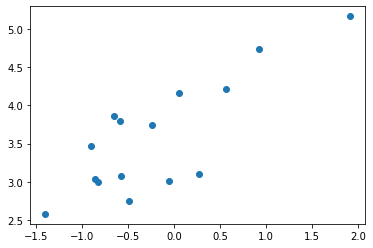

In [28]:
plt.scatter(x, y);

In [29]:
# Let's take a look at input and output shapes
print('Shape of x:', np.shape(x))
print('Shape of y:', np.shape(y))

Shape of x: (15,)
Shape of y: (15,)


In [30]:
x = tf.constant(x)
y = tf.constant(y)
x

<tf.Tensor: shape=(15,), dtype=float64, numpy=
array([ 0.92617755,  1.90941664, -1.39856757,  0.56296924, -0.65064257,
       -0.48712538, -0.59239392, -0.86399077,  0.04852163, -0.83095012,
        0.27045683, -0.05023811, -0.23894805, -0.90756366, -0.57677133])>

### Steps in Modelling with TensorFlow

We have a few steps in modelling the relationship between input and output variables. The steps are:


1.   Create a model - define the input, hidden, and output layers
2.   Compile a model - define the loss function, the optimizer, and evaluation metric
3.   Fitting a model



In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential(
    layers = [tf.keras.layers.Dense(1)]  # the output layer, outputs one number
    )

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mse, 
    optimizer = tf.keras.optimizers.SGD(), 
    metrics = ['mse']
    )

# 3. Fit the model
model.fit(x, y, epochs = 10) # ten runs through the dataset

Epoch 1/10
1/1 [==============================] - 0s 296ms/step - loss: 13.8082 - mse: 13.8082
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 13.2549 - mse: 13.2549
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 12.7247 - mse: 12.7247
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 12.2166 - mse: 12.2166
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 11.7297 - mse: 11.7297
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 11.2630 - mse: 11.2630
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 10.8157 - mse: 10.8157
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 10.3869 - mse: 10.3869
Epoch 9/10
1/1 [==============================] - 0s 21ms/step - loss: 9.9760 - mse: 9.9760
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 9.5821 - mse: 9.5821


In [32]:
model.predict(x)

array([[1.1062592 ],
       [1.5661414 ],
       [0.01892579],
       [0.93637884],
       [0.36874646],
       [0.44522697],
       [0.39599058],
       [0.2689589 ],
       [0.6957606 ],
       [0.2844127 ],
       [0.7995645 ],
       [0.64956856],
       [0.56130487],
       [0.2485789 ],
       [0.40329763]], dtype=float32)

### Improving the Model

The previous model was not that good - predictions were significantly off. However, we can improve the model by adding new hidden layers, apply different activation functions, increasing the number of epochs, etc.

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu')) # First hidden layes has 100 neurons
model.add(tf.keras.layers.Dense(50, activation = 'relu')) # The second hidden layer has 50 neurons
model.add(tf.keras.layers.Dense(50, activation = 'relu')) # The third hidden layer has 30 neurons
model.add(tf.keras.layers.Dense(1)) # default activation is linear activation

# adam optimizer; you can experiment with learning rate as well
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = ['mse', 'mae']) 

model.fit(x, y, epochs = 100) # 100 epochs

Epoch 1/100
1/1 [==============================] - 0s 466ms/step - loss: 13.2735 - mse: 13.2735 - mae: 3.5764
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0601 - mse: 13.0601 - mae: 3.5458
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8651 - mse: 12.8651 - mae: 3.5179
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6730 - mse: 12.6730 - mae: 3.4900
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4825 - mse: 12.4825 - mae: 3.4622
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2907 - mse: 12.2907 - mae: 3.4342
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0970 - mse: 12.0970 - mae: 3.4057
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9043 - mse: 11.9043 - mae: 3.3771
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7113 - mse: 11.7113 - mae: 3.3482
Epoch 10/100
1/1 [=======

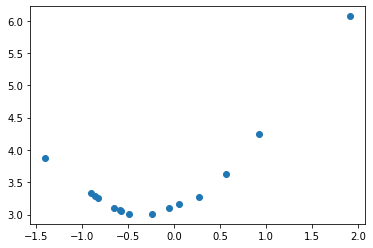

In [34]:
plt.scatter(x, model.predict(x))

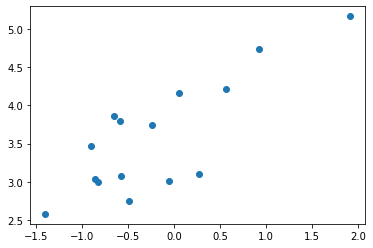

In [35]:
plt.scatter(x, y)

### Summarizing and Visualizing the Model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> 
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

A good way to evaluate model is to visualize it. It's generally a good idea to visualize:
*  The data - what data are we working with? What does it look like?
*  The model - what does our model look like?
*  The training of a model - how does a model perform whilte it learns?
*  The predictions o the model - how do the predictions of a model line up against the true values?

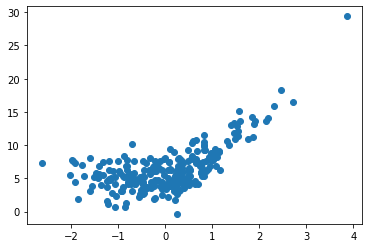

In [36]:
# Let's create a bigger dataset
np.random.seed(42)
x = np.random.normal(size = 250)
y = 5.123 + 1.869 * x + 1.3*np.square(x) + np.random.normal(size = 250, scale = 1.852)
plt.scatter(x, y);

In [37]:
# Now let's split x and y into training and testing set (let's skip validation set)
print('Length of data:', len(x))

# Split the data into train and test sets
x_train = x[:200] # The first 200 samples 
x_test = x[200:] # The last 50 samples

y_train = y[:200]
y_test = y[200:]

print('Length of x train:', len(x_train))
print('Length of x test:', len(x_test))
print('Length of y train:', len(y_train))
print('Length of y test:', len(y_test))

Length of data: 250
Length of x train: 200
Length of x test: 50
Length of y train: 200
Length of y test: 50


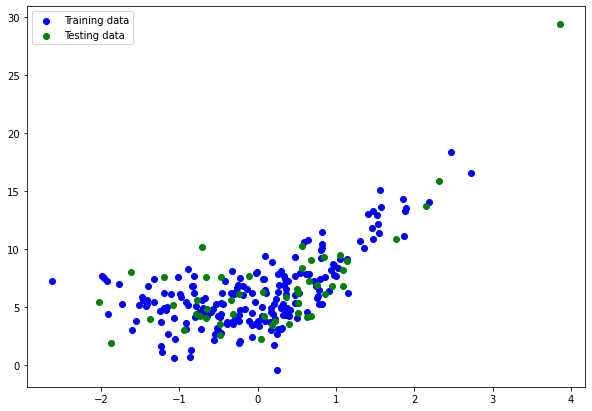

In [38]:
# Let's plot two sets of data
plt.figure(figsize = (10, 7))
plt.scatter(x_train, y_train, c = 'b', label = 'Training data')
plt.scatter(x_test, y_test, c = 'g', label = 'Testing data')
plt.legend()
plt.show();

In [39]:
# Let's build a model in order to figure out the relationship between train and test data
# Let's first visualize the model itself before fitting it
# We need to define the model and build it or fit it
# Alternatively, we can specify input_shape argument in the first layer and it will build automatically

model = tf.keras.Sequential(name = 'Network1')
model.add(
    tf.keras.layers.Dense(
        units = 50, 
        input_shape = [1],  # figure out the input_shape
        activation = 'relu', 
        use_bias = True,
        name = 'Layer1'
        )
    )
model.add(
    tf.keras.layers.Dense(
        50, 
        activation = 'relu', 
        use_bias = True, 
        kernel_regularizer = tf.keras.regularizers.L2(),
        name = 'Layer2'
        )
    ) 
model.add(tf.keras.layers.Dense(1, name = 'Output'))

model.compile(
    loss = tf.keras.losses.mse, 
    optimizer = tf.keras.optimizers.Adam(lr = 0.0001), 
    metrics = ['mse', 'mae']
    )

In [40]:
model.summary()

Model: "Network1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 50)                100       
_________________________________________________________________
Layer2 (Dense)               (None, 50)                2550      
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In the previous table, the total parameters indicates the total number of parameters in the model. Trainable parameters are those the model can update as it trains. Nontrainable parameters aren't updated during training (this is typicall when we bring in already trained parameters from other models during *transfer learning*). 

In [41]:
model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
7/7 [==============================] - 0s 3ms/step - loss: 48.8328 - mse: 48.3271 - mae: 6.2444
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 47.6184 - mse: 47.1151 - mae: 6.2070
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 46.4226 - mse: 45.9216 - mae: 6.1003
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 46.2813 - mse: 45.7826 - mae: 6.1084
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 47.9337 - mse: 47.4373 - mae: 6.2708
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 47.3536 - mse: 46.8595 - mae: 6.1135
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 46.8866 - mse: 46.3948 - mae: 6.1635
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 48.6287 - mse: 48.1390 - mae: 6.2848
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 48.6016 - mse: 48.1140 - mae: 6.2029
Epoch 10/200
7/7 [==========

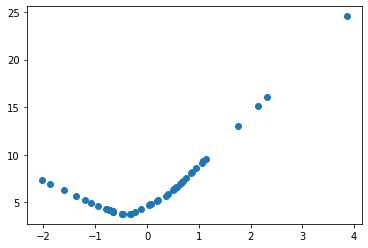

In [42]:
plt.scatter(x_test, model.predict(x_test));

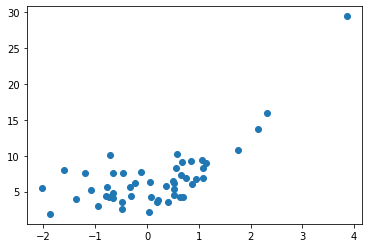

In [43]:
plt.scatter(x_test, y_test);

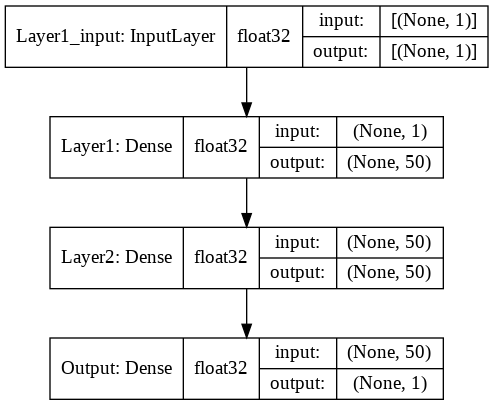

In [44]:
# Another way to visualize the mode
from tensorflow.keras.utils import plot_model, Progbar
plot_model(model, show_shapes = True, show_dtype = True, )

### Visualizing Model's Predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions). 

In [45]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred.T

array([[ 5.717956 ,  6.598944 ,  9.324403 ,  9.166467 ,  5.7066064,
         4.676074 ,  6.381048 ,  6.3750978,  6.381108 , 24.559025 ,
         6.647077 ,  9.607966 ,  8.629879 ,  7.0536933,  3.827784 ,
         7.6097975,  4.307942 ,  4.0103793,  3.822743 ,  4.8910975,
        16.034634 ,  6.9313803,  7.231827 ,  6.294599 ,  3.8146334,
         9.356259 ,  4.8408656,  4.987948 ,  4.1804194,  7.1977906,
         4.213164 ,  5.2782826,  4.787457 ,  4.0470285, 15.091164 ,
         6.964433 ,  7.326327 ,  5.191854 ,  4.0683575,  8.098561 ,
         4.3519063,  4.34045  ,  6.3331914,  8.168226 ,  5.2705827,
         3.7985678,  3.816453 ,  4.050648 , 13.015759 ,  5.8992724]],
      dtype=float32)

In [46]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Train data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', label = 'Test data')
  # Plot model's predictions
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  # show the legend
  plt.legend()
  return plt

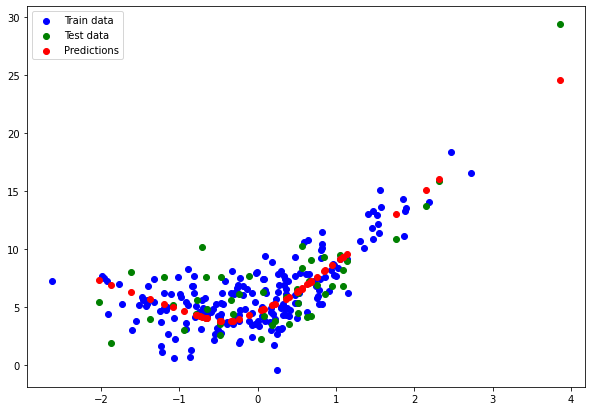

In [47]:
plot_predictions(x_train, y_train, x_test, y_test, y_pred);

### Evaluating the Model with Evaluation Metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluate the model's performance.

In the regression problems, three most frequently used metrics are:


*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Huber (combination of MAE and MSE; less sensitive to outliers)
  *  Huber approaches MSE when $\delta$ aproaches 0, while it approaches MAE when $\delta\$ approaches infinity 


The MAE is given by:

$$
\begin{aligned}
MAE = \frac{1}{N}\sum_{i = 1}^{N}|y_{i} - \hat{y_{i}}|
\end{aligned}
$$

The MSE is given by:

$$
\begin{aligned}
MSE = \frac{1}{N}\sum_{i = 1}^{N}(y_{i} - \hat{y_{i}})^{2}
\end{aligned}
$$

The Huber is given by:

$$
\begin{equation}
    L_{\delta}(y, f(x)) =
    \left\{
        \begin{array}{cc}
                \frac{1}{2}(y - f(x))^2 & \mathrm{if\ } |y - f(X)| \le \delta \\
                \delta|y - f(x)|-\frac{1}{2}\delta^2 & \mathrm{otherwise\ } \\
        \end{array} 
    \right.
\end{equation}
$$
<br>
MAE in TF is represented by `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()`. MSE is represented by `tf.keras.losses.MSE()` or `tf.metrics.mean_squared_error()`. Huber is represented by `tf.keras.losses.huber()`.


In [48]:
# Evaluate the model on the test set the quick way
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 5.1528 - mse: 4.7203 - mae: 1.6990


[5.152801513671875, 4.720340251922607, 1.6989610195159912]

In [49]:
model_mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred)) # you need to squeeze the predictions because of the dimensions problem
model_mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
model_huber = tf.keras.losses.huber(y_test, tf.squeeze(y_pred), delta = 1.0)

for i in [model_mae, model_mse, model_huber]:
  print(i)
  print(i.numpy())
  print('--------')

tf.Tensor(1.698961, shape=(), dtype=float32)
1.698961
--------
tf.Tensor(4.7203403, shape=(), dtype=float32)
4.7203403
--------
tf.Tensor(1.2821245, shape=(), dtype=float32)
1.2821245
--------


### Experimenting with the Model

In essence, in order to improve the model, we should make it bigger or train it for longer time. Let's do three "experiments". The first one should be the base model with only one layer and trained for 300 epochs. The second one could be with two layers and trained for 300 epochs. The final one could have two layers and be trained for 500 epochs. 

Let's create some data and try it!

In [67]:
# Before tackling "experiments", let's create some quick functions for getting evaluation metrics

def evaluate_nn(y_test, y_pred):
  mae = tf.keras.losses.MAE(y_test, y_pred).numpy()
  mse = tf.keras.losses.MSE(y_test, y_pred).numpy()
  huber = tf.keras.losses.huber(y_test, y_pred, delta = 1.0).numpy()
  return mae, mse, huber

In [72]:
# First experiment
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

model1.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse', 'mae']
)

model1.fit(x_train, y_train, epochs = 300, verbose = 0);

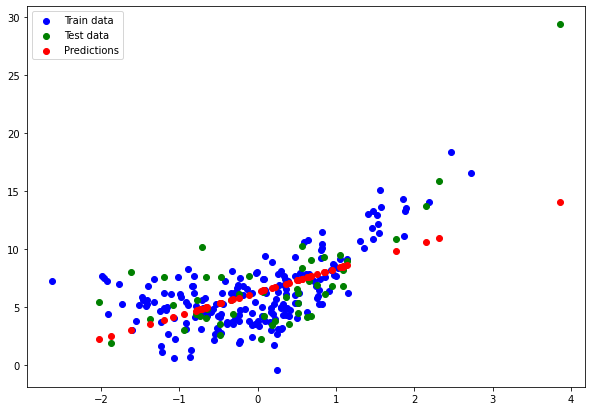

In [73]:
model1_pred = model1.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, model1_pred);

We can see that the learned relationship is linear since we have only one layer and it's activation is linear activation. Let's evaluate it and try another model.

In [74]:
results1 = evaluate_nn(y_test, tf.squeeze(model1_pred))
print('MAE:', results1[0])
print('MSE:', results1[1])
print('Huber:', results1[2])

MAE: 2.1142788
MSE: 9.882532
Huber: 1.6682762


In [75]:
# Experiment 2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss = tf.keras.losses.mse,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mse', 'mae'])

model2.fit(x_train, y_train, epochs = 300, verbose = 0);

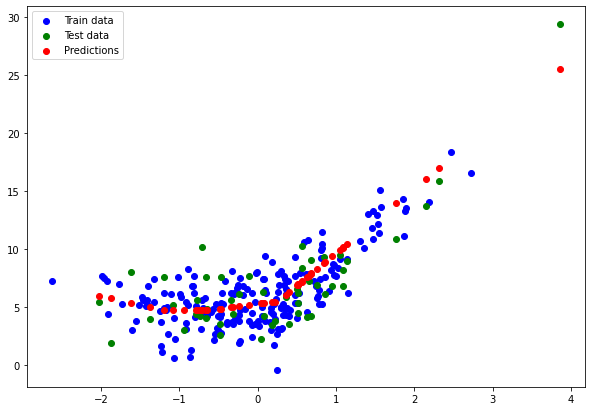

In [76]:
model2_pred = model2.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, model2_pred);

In [77]:
results2 = evaluate_nn(y_test, tf.squeeze(model2_pred))
print('MAE:', results2[0])
print('MSE:', results2[1])
print('Huber:', results2[2])

MAE: 1.7854687
MSE: 4.648294
Huber: 1.3296442


> We can see this model is actually better than the previous one! Let's try the third experiment with 500 epochs, Adam optimizer and learning rate of 0.0001.

In [83]:
# Third experiment
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model3.add(tf.keras.layers.Dense(1))

model3.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
    metrics = ['mse', 'mae']
)

model3.fit(x_train, y_train, epochs = 500, verbose = 0);

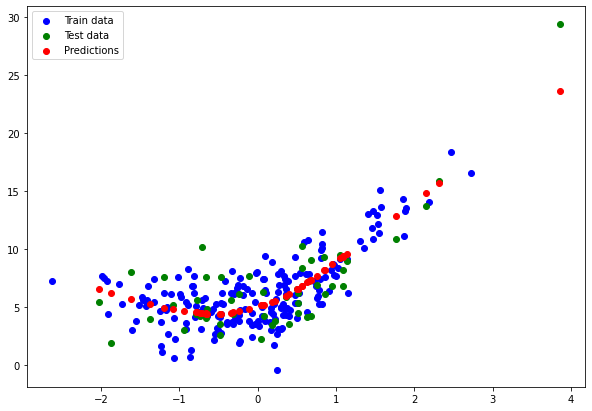

In [85]:
model3_pred = model3.predict(x_test);
plot_predictions(x_train, y_train, x_test, y_test, model3_pred);

In [87]:
results3 = evaluate_nn(y_test, tf.squeeze(model3_pred))
print('MAE:', results3[0])
print('MSE:', results3[1])
print('Huber:', results3[2])

MAE: 1.6700377
MSE: 4.555373
Huber: 1.2456819


> This model is also very good. Let us compare the metrics of all three models next to each others.

In [88]:
print('MAE Model1:', results1[0], '   MAE Model2:', results2[0], '   MAE Model3:', results3[0])
print('MSE Model1:', results1[1], '   MSE Model2:', results2[1], '   MSE Model3:', results3[1])
print('Huber Model1:', results1[2], '   Huber Model2:', results2[2], '   Huber Model3:', results3[2])

MAE Model1: 2.1142788    MAE Model2: 1.7854687    MAE Model3: 1.6700377
MSE Model1: 9.882532    MSE Model2: 4.648294    MSE Model3: 4.555373
Huber Model1: 1.6682762    Huber Model2: 1.3296442    Huber Model3: 1.2456819


Base on the previous results, we can conclude that Model 3 is the best one. However, note that the difference is practically negligible. Furthermore, we didn't use validation set as well, which could mean that the possibility of overfitting on the test data exists.

In [89]:
# Let's just create a new model with 5000 epochs, just for fun 
# although we already approcimated the function really well with model2 and model3 :) 

model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Dense(100, activation = 'relu'))
model4.add(tf.keras.layers.Dense(100, activation = 'relu'))
model4.add(tf.keras.layers.Dense(1))

model4.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
    metrics = ['mse', 'mae']
)

model4.fit(x_train, y_train, epochs = 5000, verbose = 0);

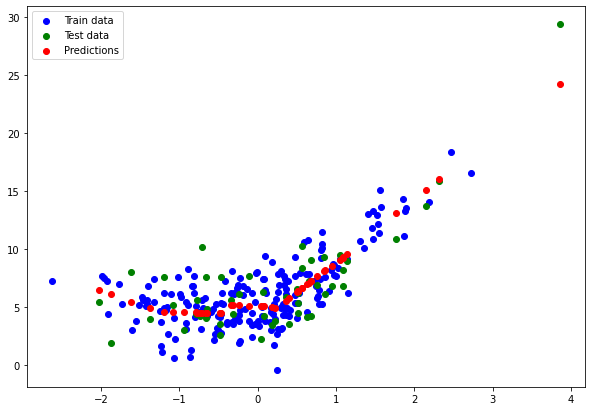

In [91]:
model4_pred = model4.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, model4_pred);

In [92]:
results4 = evaluate_nn(y_test, tf.squeeze(model4_pred))
print('MAE:', results4[0])
print('MSE:', results4[1])
print('Huber:', results4[2])

MAE: 1.624366
MSE: 4.280773
Huber: 1.1900197


Based on these results, we can conclude that training our model for longer will not always lead to better results. In essence, if we can approximate the function really well with 300 or 500 epochs, there is no need to go over that since the results will be the same. Therefore, we can always start with smaller models in order to see if they work and increase the complexity of the model only if it is necessary. 

In [95]:
# Let's put evaluation metrics into a pandas dataframe
import pandas as pd 

model_results = [['model1', results1[0], results1[1], results1[2]],
                 ['model2', results2[0], results2[1], results2[2]],
                 ['model3', results3[0], results3[1], results3[2]],
                 ['model4', results4[0], results4[1], results4[2]]
                 ]

result_metrics = pd.DataFrame(model_results, columns = ['Model', 'MAE', 'MSE', "HUBER"])
print(result_metrics)

    Model       MAE       MSE     HUBER
0  model1  2.114279  9.882532  1.668276
1  model2  1.785469  4.648294  1.329644
2  model3  1.670038  4.555373  1.245682
3  model4  1.624366  4.280773  1.190020


<br><br/>
Of course, whitle tackling a real-world problem we would experiment with a lot of different models, so tracking their losses this way could become tedious. Obviously, we woudln't do that (this was just for the sake of learning) - we would use some better ways to track our experiments.
Those tools are:


*   TensorBoard - a component of the TF library to help track modelling experiments
*   Weights & Biases - a tool for tracking all kinds of machine learning experimens (plugs straight into TensorBoard)

We will cover these soon enough.



### Saving and Loading the Model

Let's say that we have tried a few models and we want to save/export the specific one (model3 in this case, since it proved to be the most optimal one). In essence, how do we export a model from Google Colab or Jupyter Notebook?

There are a [few ways to save our model](https://www.tensorflow.org/tutorials/keras/save_and_load). 


1.   We can save checkpoints during training and if something interrupts the training we can pick up where we left off
2.   With the SavedModel format (also useful for continuing with training)
3.   With HDF5 format (also useful for continuing with training)



In [104]:
# Save the model using the savedmodel format
# It saves it in Google Colab!
model3.save('best_model')

# Let's save it as HDF5 format 
model3.save('best_modelh5.h5')

INFO:tensorflow:Assets written to: best_model/assets


As a rule of a thumb, if we want to use the model inside TF, when it is better to save it in a SavedModel format, while HDF5 is more suitable for other purposses.

In [106]:
# Let's try to load the model, we can load it from both formats
loaded_model = tf.keras.models.load_model('best_model.h5')

In [107]:
loaded_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


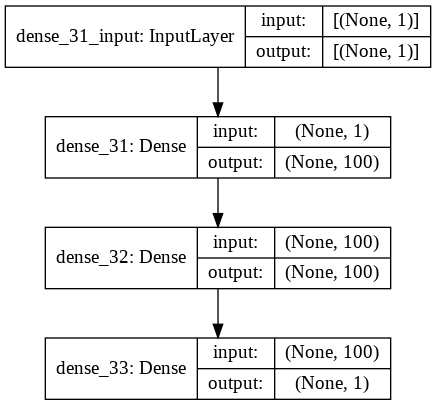

In [111]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_model, show_shapes = True)